<a href="https://colab.research.google.com/github/yooje153/-/blob/main/Lecture09_seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Seaborn

* matplotlib 기반의 시각화 라이브러리
* matplotlib를 기반으로 하는 다양한 색상 테마 제공
* matplotlib에서보다 통계와 관련된 다양한 차트 제공 -> 데이터 분석에 활발히 사용
* 기본적인 시각화 기능은 matplotlib에 depend
* 기본적인 통계 기능은 Statsmodels에 depend
* [seaborn package Gallery](https://seaborn.pydata.org/tutorial.html)


In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
import seaborn as sns
sns.__version__

## Figure-level vs. axes-level function

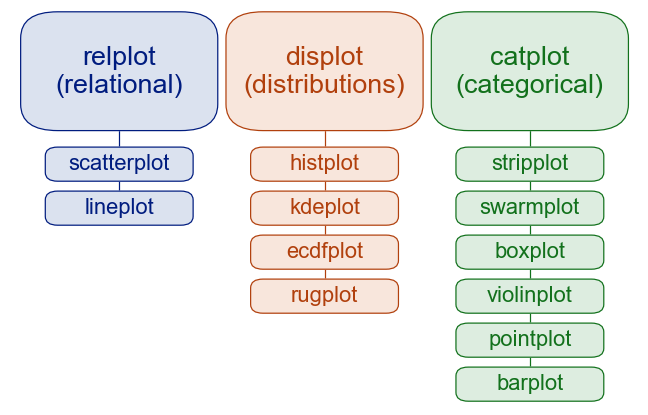

구분 | 종류 | Figure-level function | Axes-level function | Others
:--- | :--- | :--- | :--- | :---
관계도 (relational plot) | 산점도 | `sns.relplot(kind="scatter")` | `sns.scatterplot()` | default
     | 선그림 | `sns.relplot(kind="line")` | `sns.lineplot()` |
분포도 (distribution plot) | 히스토그램 | `sns.displot(kind="hist")` | `sns.histplot()` | default
  | 밀도그림 | `sns.displot(kind="kde")` | `sns.kdeplot()` |  
  | 누적분포그림 | `sns.displot(kind="ecdf")` | `sns.ecdfplot()` |
  | 눈금그림 |  | `sns.rugplot()` | 밀도그림, 산점도 등의 하단에 추가되는 marginal plot
  | 분포도 | `sns.distplot()` | | 일변량 자료의 히스토그램, 밀도그림, rugplot 작성 시 사용되었으나, 곧 삭제 예정
범주형 산점도 (categorical scatterplot) | 점도표 | `sns.catplot(kind="strip")` | `sns.stripplot()` | default
 | 점도표 (no overlay) | `sns.catplot(kind="swarm")` | `sns.swarmplot()` |  
범주형 분포도 (categorical distributiona plot) | 상자그림 | `sns.catplot(kind="box")` | `sns.boxplot()` |
 | 바이올린그림 | `sns.catplot(kind="violin")` | `sns.violinplot()` |
 | 문자값 그림 (letter value plot) | `sns.catplot(kind="boxen")` | `sns.boxenplot()` | 4분위수만이 아니라, 8, 16, 64, 128분위수를 이용, 빅데이터에 적용
범주형 추정그림 (categorical estimate plots) | 점추정그림 | `sns.catplot(kind="point")` | `sns.pointplot()` | 점추정치와 신뢰구간을 산점도 형식으로 표현
 | 평균막대그림 | `sns.catplot(kind="bar")` | `sns.barplot()` | 점추정치와 신뢰구간을 막대 형식으로 표현
  | 빈도막대그림 | `sns.catplot(kind="count")` | `sns.countplot()` | 빈도를 막대로 표현
회귀도표 (regression plot) | 회귀선과 산점도 |  -  | `sns.regplot()` | 데이터와 선형회귀선 도표
    | 다중회귀도표 | `sns.lmplot()` | - | `regplot()`과 `FacetGrid`의 결합
    | 잔차도표 | - | `sns.residplot()` |
행렬도표 (matrix plot) | 히트맵 | - | `sns.heatmap()` |
 | 덴드로그램과 히트맵 | - | `sns.clustermap()` |
다중도표 (multi-plot grids) | 그리드세팅 | `sns.FacetGrid()` | 한 데이터프레임의 변수들을 이용하여 다중도표 figure를 세팅
 | 다변수 그림 | `sns.pairplot()` | 한 데이터의 여러 변수를 이용하여 다중도표 작성
 | 다변수 그리드 세팅 | `sns.PairGrid()` | 한 데이터의 여러 변수를 이용하여 다중도표 figure를 세팅
 | 이변수 그림 | `sns.jointplot()` | 한 데이이터의 두 개 변수를 이용하여 그림 작성
 | 이변수 그리드 세팅 | `sns.JointGrid()` | 한 데이터의 두 개 변수를 이용하여 그림 figure를 세팅




## Style

* `sns.set_style()` : 그림의 전반적인 모양을 지정
* `sns.set_theme(style="")` : 위와 동일
* seaborn의 경우 5가지 기본 테마 제공 : ["white"(default), "dark", "whitegrid", "darkgrid", "ticks"]

In [ ]:
x = ["A", "B", "C"]
y = [1, 3, 2]

plt.figure(figsize=(25, 5))
sns.set_theme(style="white")
plt.subplot(151)
sns.barplot(x, y)
plt.title("white")

sns.set_theme(style="dark")
plt.subplot(152)
sns.barplot(x, y)
plt.title("dark")

sns.set_theme(style="whitegrid")
plt.subplot(153)
sns.barplot(x, y)
plt.title("whitegrid")

sns.set_theme(style="darkgrid")
plt.subplot(154)
sns.barplot(x, y)
plt.title("darkgrid")

sns.set_theme(style="ticks")
plt.subplot(155)
sns.barplot(x, y)
plt.title("ticks");

* Warning message 삭제하기
    * 파이썬은 가까운 미래에 지원하지 않거나 변경되는 기능에 대하여 위와 같은 경고메세지를 출력함
    * 경고성 메시지를 없애려면 warnings 모듈 사용

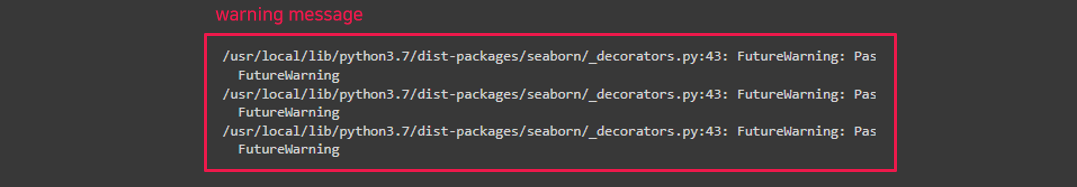

In [ ]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

# 관계도

* Relational plot
* 통계적 관계들을 시각화하는 Figure-level에 속하는 클래스
* `sns.FacetGrid()`와 함께 axes-level에 대한 그림을 그리기 용이


구분 | 종류 | Figure-level function | Axes-level function | Others
:--- | :--- | :--- | :--- | :---
관계도 (relational plot) | 산점도 | `sns.relplot(kind="scatter")` | `sns.scatterplot()` | default
     | 선그림 | `sns.relplot(kind="line")` | `sns.lineplot()` |

## 산점도
서로 다른 2개의 연속형(수치형) 변수 사이에 점을 찍는 그래프
* `sns.relplot(kind="scatter")`
* `sns.scatterplot(x, y, data, hue, style, size, sizes)`
    * `hue` : 특성을 구분할 컬럼 지정 (색으로 구분)
    * `style` : 특성을 구분할 컬럼 지정 (모양으로 구분)
    * `size` : 마커의 크기를 지정할 수 있는 변수 설정 / 연속형 범주형 모두 가능
    * `sizes` : size의 최소, 최대를 지정

* `hue`, `style`, `size`를 한꺼번에 지정하면 복잡도가 높아짐
* 변수간 연관성을 알아보는 것이 오히려 어려움

In [ ]:
# tips 데이터
# 손님들의 식사비용(total_bill), 팁(tip), 성별(sex), 흡연유무(smoker), 요일(day), 시간(time), 인원수(size)

tips = sns.load_dataset("tips")
tips

In [ ]:
sns.scatterplot(x = 'total_bill', y='tip', data=tips);

In [ ]:
# relplot의 default는 "scatter"
sns.relplot(x="total_bill", y="tip", data=tips);

In [ ]:
# hue를 이용하여 그룹별 색상을 달리하여 표현 가능
sns.relplot(x="total_bill", y="tip", data=tips, hue="smoker");

In [ ]:
# style을 이용하면 그룹별 모양도 달리할 수 있음
sns.relplot(x="total_bill", y="tip", data=tips, hue="smoker", style="smoker");

In [ ]:
# smoker로 색상 구분, time으로 모양 구분하기
sns.relplot(x="total_bill", y="tip", data=tips, hue="smoker", style="time");

In [ ]:
# 마커의 크기를 인원수에 따라 조정하기
sns.relplot(x="total_bill", y="tip", data=tips, size="size");

In [ ]:
# 마커의 크기에 대한 범위 지정해주기
# 이런 경우 데이터를 해당 범위 안에서 normalized 시켜서 그림
sns.relplot(x="total_bill", y="tip", data=tips, size="size", sizes=(15, 200));

## 다중그림 그리기

* `col` : 열기준 다중도표를 그릴 기준 컬럼 지정
* `col_wrap` : 한 행에 표기할 컬럼의 갯수 지정
* `row` : 행기준 다중도표를 그릴 기준 컬럼 지정
* `row_wrap` : 한 열에 표기할 행의 개수 지정


In [ ]:
# tips에서 시간대별 총금액 대비 팁 액수 산점도
sns.relplot(x="total_bill", y="tip", data=tips, hue="time");

In [ ]:
# 성별에 따라 점모양 달리해서 그려보기
sns.relplot(x="total_bill", y="tip", data=tips, hue="time", style="sex");

In [ ]:
# 성별에 따라 그림을 분리해서 그려보기 (2열로 그리기)
sns.relplot(x="total_bill", y="tip", data=tips, hue="time", col="sex");

In [ ]:
# 성별에 따라 그림을 분리해서 그려보기 (2행으로 그리기)
sns.relplot(x="total_bill", y="tip", data=tips, hue="time", row="sex");

In [ ]:
# 요일에 따라 나눠 그려보기
sns.relplot(x="total_bill", y="tip", data=tips, hue="time", col="day");

In [ ]:
# 요일에 따라 나눠 그려보기 (단 한 줄에 2개씩 넣고 싶다)
sns.relplot(x="total_bill", y="tip", data=tips, hue="time", col="day", col_wrap=2);

In [ ]:
# 크기 조절 (높이=height, 너비=aspect)
sns.relplot(x="total_bill", y="tip", data=tips, hue="time", col="day", col_wrap=2, height=3, aspect=1.5);

## 선도표

* `sns.relplot(kind="line")`
* `sns.lineplot(x, y, data, hue, style, size, sizes, hue_order, style_order, size_order, estimator, ci, sort)`
    * `order` : 특성 구분 시 순서 결정
    * `estimator` : 동일한 x값에 대해 여러개의 y값이 있는 경우 통합추정치에 대한 통계량
    * `ci` : 동일한 x값에 대해 여러개의 y값이 있는 경우 통합추정치에 대한 신뢰구간
    * `sort` : x값을 오름차순으로 정렬 (default=True)

In [ ]:
# 자동으로 x값을 정렬하여 그림 도표
sns.lineplot(x="total_bill", y="tip", data=tips);

In [ ]:
# 정렬하지 않을 경우
sns.lineplot(x="total_bill", y="tip", data=tips, sort=False);

In [ ]:
# flight 데이터 / 연월대비 승객수
flights = sns.load_dataset("flights")
flights.head()

In [ ]:
# x값이 동일한 데이터가 여러개인 경우 aggregation해서 평균으로 그리고 신뢰구간 도표함
# 방법 1) replot - line
sns.relplot(kind="line", x="year", y="passengers", data=flights);

In [ ]:
# x값이 동일한 데이터가 여러개인 경우 aggregation해서 평균으로 그리고 신뢰구간 도표함
# 방법 2) lineplot
sns.lineplot(x="year", y="passengers", data=flights);

In [ ]:
# 추정치를 중앙값으로 변경하고 신뢰구간은 표기하지 않을 경우
sns.lineplot(x="year", y="passengers", data=flights, ci=None, estimator=np.median);

In [ ]:
# 추정치를 최소값으로 하고 싶은 경우
sns.lineplot(x="year", y="passengers", data=flights, ci=None, estimator=np.min);

In [ ]:
# 추정치를 평균으로 하고 ci를 sd로 하고 싶은 경우
sns.lineplot(x="year", y="passengers", data=flights, ci="sd", estimator=np.mean);

In [ ]:
# 월별로 연도별 승객수를 따로 그려보고 싶은 경우
sns.lineplot(x="year", y="passengers", data=flights, hue="month");

In [ ]:
# 데이터 중 1월과 8월만 그리고 싶은 경우
sns.lineplot(x="year", y="passengers", data=flights.query("month == 'Jan' | month == 'Aug'"),
             hue="month", hue_order=["Jan", "Aug"]);

In [ ]:
sns.lineplot(x="year", y="passengers", data=flights.query("month == 'Jan' | month == 'Aug'"),
             hue="month", hue_order=["Jan", "Aug"],
             style="month", style_order=["Jan", "Aug"]);

In [ ]:
# 마커 추가
sns.lineplot(x="year", y="passengers", data=flights.query("month == 'Jan' | month == 'Aug'"),
             hue="month", hue_order=["Jan", "Aug"],
             style="month", style_order=["Jan", "Aug"],
             markers=True);

In [ ]:
# 마커 추가
sns.lineplot(x="year", y="passengers", data=flights.query("month == 'Jan' | month == 'Aug'"),
             hue="month", hue_order=["Jan", "Aug"],
             style="month", style_order=["Jan", "Aug"],
             markers=["^", "v"]);

In [ ]:
# 선두께 변경
sns.lineplot(x="year", y="passengers", data=flights.query("month == 'Jan' | month == 'Aug'"),
             hue="month", hue_order=["Jan", "Aug"],
             style="month", style_order=["Jan", "Aug"],
             size="month", size_order=["Jan", "Aug"],
             markers=["^", "v"]);

# 분포도

## 히스토그램
연속형(수치형) 데이터의 분포. x축 데이터에 따른 빈도수
* `sns.displot(kind="hist")`
* `sns.histplot(x, y, data, binwidth, bins, stat, cumulative, multiple, element)`
    * `binwidth` : 빈 두께
    * `bins` : 빈 개수
    * `stat` : 통계량 ["count" (default), "probability", "percent", "density"]
    * `cumulative` : True이면 누적
    * `multiple` : 특성별 그릴 경우 "layer", "dodge", "stack", "fill" 중 선택 가능
    * `element` : 막대모양 "bars", "step", "poly"
    

In [ ]:
# 펭귄 데이터 가져오기
penguins = sns.load_dataset("penguins")
penguins

In [ ]:
# 지느러미 길이로 히스토그램 작성
sns.histplot(x="flipper_length_mm", data=penguins);

In [ ]:
# 가로로 히스토그램 그리기
sns.histplot(y="flipper_length_mm", data=penguins);

In [ ]:
# 빈도 대신 밀도로 보여주기
sns.histplot(x="flipper_length_mm", data=penguins, stat="density");

In [ ]:
# 누적하기
sns.histplot(x="flipper_length_mm", data=penguins, cumulative=True);

In [ ]:
# bin 너비 지정
sns.histplot(x="flipper_length_mm", data=penguins, binwidth=10);

In [ ]:
# bin 개수 지정
sns.histplot(x="flipper_length_mm", data=penguins, bins=30);

In [ ]:
# 밀도추정선 추가
sns.histplot(x="flipper_length_mm", data=penguins, kde=True);

In [ ]:
# 종별로 색상 다르게
sns.histplot(x="flipper_length_mm", data=penguins, hue="species");

In [ ]:
# 종별로 색상 달리 하되, 간격을 줄여서 떨어뜨리기
sns.histplot(x="flipper_length_mm", data=penguins, hue="species", shrink=0.8, multiple="dodge");

In [ ]:
# 종별로 색상 달리하되, 누적하기
sns.histplot(x="flipper_length_mm", data=penguins, hue="species", multiple="stack");

In [ ]:
# 종별로 색상 달리하되, 도수분포다각형으로 그리고, 투명도 조정하기
sns.histplot(x="flipper_length_mm", data=penguins, hue="species", element="poly", alpha=0.8);

## 밀도그림
커널 밀도(Kernel density)는 커널이라는 함수를 겹치는 방법으로 히스토그램보다 부드러운 분포 곡선으로 시각화됨.   
그래프의 면적이 1이 되도록 하는 그래프. x축 데이터에 따른 density
* `sns.displot(kind="kde")`
* `sns.kdeplot(x, y, data, bw_adjust, cumulative)`
    * `bw_adjust` : 밀도 추정시 추정할 데이터의 간격 조정 (defalut = 1)
    * `cumulative` : True이면, 누적 분포 함수 추정

In [ ]:
# tips 데이터에서 팁 금액에 대한 밀도추정그림 그리기
sns.kdeplot(x="tip", data=tips);

In [ ]:
# 가로로 그리기
sns.kdeplot(y="tip", data=tips);

In [ ]:
# 여러개를 한꺼번에 그리기
sns.kdeplot(data=tips[["total_bill", "tip"]]);

In [ ]:
# 밀도 추정시 추정한 데이터의 간격 조정 (smoothing)
sns.kdeplot(x="tip", data=tips, bw_adjust=0.2);

In [ ]:
# 시간대에 따라 색을 달리하여 추정하기
sns.kdeplot(x="tip", data=tips, hue="time");

In [ ]:
# 시간대에 따라 색을 달리하여 추정하기 (색채우기)
sns.kdeplot(x="tip", data=tips, hue="time", fill=True);

In [ ]:
# 색상 지정하기
# palette: https://seaborn.pydata.org/generated/seaborn.color_palette.html#seaborn.color_palette
sns.kdeplot(x="tip", data=tips, hue="time", fill=True, palette='husl');

In [ ]:
# 누적 분포 함수
sns.kdeplot(x="tip", data=tips, cumulative=True, fill=True);

### 1차원 실수 분포  
자료의 분포를 묘사하기 위한 것으로 데이터 위치를 x축 위에 작은 선분(rug)으로 나타내어 실제 데이터의 위치를 보여줌

In [ ]:
# 밀도함수에 rug 생성
sns.kdeplot(x="tip", data=tips, cumulative=True, fill=True)
sns.rugplot(x="tip", data=tips);

In [ ]:
# 산점도에 러그 깔기
sns.scatterplot(x="total_bill", y="tip", data=tips)
sns.rugplot(x="total_bill", y="tip", data=tips);

# 범주형 도표

## 점도표

* 점으로 히스토그램 또는 막대그림 그리기 (지터형식)
    * `sns.catplot(kind="strip")` : defalut
    * `sns.stripplot()`

* 점으로 히스토그램 또는 막대그림 그리기 (겹치지 않게)
    * `sns.catplot(kind="swarm")`
    * `sns.swarmplot()`



In [ ]:
# 팁금액을 점도표로 그려보기 (strip)
sns.stripplot(x=tips["tip"]);

In [ ]:
# 팁금액을 점도표로 그려보기 (swarm)
sns.swarmplot(x=tips["tip"]);

In [ ]:
# 요일별로 팁 금액 점도표 그리기
sns.swarmplot(x="day", y="tip", data=tips);

In [ ]:
# 요일별로 팁 금액 점도표 그리기
sns.stripplot(x="day", y="tip", data=tips);

In [ ]:
# 지터를 축소해보기
sns.stripplot(x="day", y="tip", data=tips, jitter=0.05);

In [ ]:
# 가로로 눕혀보기
sns.stripplot(y="day", x="tip", data=tips);

In [ ]:
# 점의 바깥 선 두께를 변경해보기
sns.stripplot(x="day", y="tip", data=tips, linewidth=1);

In [ ]:
# 성별에 따라 색상 달리 하기
sns.stripplot(x="day", y="tip", data=tips, hue="sex");

In [ ]:
# 성별에 따라 색상 달리하고 떨어뜨려서 그리기
sns.stripplot(x="day", y="tip", data=tips, hue="sex", dodge=True);

In [ ]:
# hue_order: 범주형 색상 적용 순서 정하기
# 여자 먼저 그려지게 하기
sns.stripplot(x="day", y="tip", data=tips, hue="sex", dodge=True, hue_order=["Female", "Male"]);

In [ ]:
# 점모양과 사이즈 바꾸기
sns.stripplot(x="day", y="tip", data=tips, marker="D", size=10);

In [ ]:
# 투명도 주고 바깥 라인색을 회색으로 지정
sns.stripplot(x="day", y="tip", data=tips, marker="D", size=10, alpha=0.25, edgecolor="gray");

## 박스그림
범주형 데이터를 기준으로 수치형 데이터의 분포를 파악하는데 사용
* `sns.catplot(kind="box")`
* `sns.boxplot(x, y, data)`

In [ ]:
sns.boxplot(x="tip", data=tips)
plt.xlabel("tip (won)");

In [ ]:
# 가로로 그리기
sns.boxplot(y="tip", data=tips);

In [ ]:
# 요일별 팁금액 박스그림 그리기
sns.boxplot(x="day", y="tip", data=tips);

In [ ]:
# 성별에 따라 나눠서 그리기
sns.boxplot(x="day", y="tip", data=tips, hue="sex");

In [ ]:
# 박스 너비 조율하기 (0.8이 디폴트)
sns.boxplot(x="day", y="tip", data=tips, hue="sex", width=0.5);

In [ ]:
# 라인 두께 조정하기
sns.boxplot(x="day", y="tip", data=tips, linewidth=3);

In [ ]:
# jitter plot 얹기
sns.boxplot(x="day", y="tip", data=tips)
sns.stripplot(x="day", y="tip", data=tips, color="b", marker="*");

In [ ]:
# 성별 및 흡연여부에 따라 팁금액의 박스를 따로 그리고, 이것을 시간대에 따라 나눠 그리기
# sns.boxplot(x="sex", y="tip", data=tips, hue="smoker", col="time"); boxplot으로 그리면 에러 발생 (catplot으로 그려야 됨)
sns.catplot(kind="box", x="sex", y="tip", data=tips, hue="smoker", col="time");

## [바이올린그림](https://towardsdatascience.com/violin-plots-explained-fb1d115e023d)
데이터 분포의 시각화. 박스그림과 비슷하며 커널 밀도그림이 합쳐진 형태
* `sns.catplot(kind="violin")`
* `sns.violinplot(x, y, data)`

In [ ]:
sns.violinplot(x="tip", data=tips);

In [ ]:
# 요일별 팁금액
sns.violinplot(x="day", y="tip", data=tips);

In [ ]:
# 성별에 따라 따로 그리기
sns.violinplot(x="day", y="tip", data=tips, hue="sex");

In [ ]:
# 성별에 따라 나눠 그리되, 반반 그리기
sns.violinplot(x="day", y="tip", data=tips, hue="sex", split=True);

In [ ]:
# 일요일이 먼저 오게 그리기
sns.violinplot(x="day", y="tip", data=tips, order=["Sun", "Thur", "Fri", "Sat"]);

In [ ]:
# 안 쪽에 퀀타일 라인 표기 하기 (사분위 범위만 표시)
sns.violinplot(x="day", y="tip", data=tips, inner="quartile");

In [ ]:
# 분포 안에 모든 관측치 표시
sns.violinplot(x="day", y="tip", data=tips, inner="stick");

In [ ]:
# 라인 추정 시 빈 너비 지정하기 (bw="scott", "silverman", 또는 숫자; scott는 defalut)
sns.violinplot(x="day", y="tip", data=tips, bw=0.2);

## 점추정그림
점추정치 및 신뢰구간을 표시
* `sns.catplot(kind="point")`
* `sns.pointplot(x, y, data)`

In [ ]:
# 요일별 팁금액에 대한 점도표 그려보기
sns.catplot(x="day", y="tip", data=tips);

In [ ]:
# 각 요일에 대한 평균 추정치로 그리기
sns.pointplot(x="day", y="tip", data=tips);

In [ ]:
# 선 제외하기
sns.pointplot(x="day", y="tip", data=tips, join=False);

In [ ]:
# 중앙값으로 그리기
sns.pointplot(x="day", y="tip", data=tips, estimator=np.median);

In [ ]:
# 에러막대 지우기
sns.pointplot(x="day", y="tip", data=tips, ci=None);

In [ ]:
# 에러막대 표준편차로 바꾸기
sns.pointplot(x="day", y="tip", data=tips, ci="sd");

In [ ]:
# 에러막대에 캡 씌우기
sns.pointplot(x="day", y="tip", data=tips, capsize=.2);

In [ ]:
# 성별에 따라 따로 그리기
sns.pointplot(x="day", y="tip", data=tips, hue="sex");

In [ ]:
# 성별에 따라 따로 그리기
sns.catplot(kind="point", x="day", y="tip", data=tips, col="sex");

## 평균막대그림
x는 범주형이고 가는 선은 포인트 추정치로 신뢰구간과 유사
* `sns.catplot(kind="bar")`
* `sns.barplot(x, y, data)`

In [ ]:
# 요일에 다른 팁 금액에 대한 평균 막대 그림
sns.barplot(x="day", y="tip", data=tips);

In [ ]:
# 가로로 그리기
sns.barplot(y="day", x="tip", data=tips);

In [ ]:
# 요일에 다른 팁 금액을 시간대로 나누어서 그리기
sns.barplot(x="day", y="tip", data=tips, hue="time");

In [ ]:
# 범례를 밖으로 빼기 (catplot 단위에서 수행)
sns.catplot(kind="bar", x="day", y="tip", data=tips, hue="time", legend_out=True);

In [ ]:
# 추정치를 중앙값으로, 막대를 표준편차로, 캡 씌우기
sns.barplot(x="day", y="tip", data=tips, estimator=np.median, ci="sd", capsize=.2);

In [ ]:
# 추정치를 중앙값으로, 막대를 표준편차로, 캡 씌우기
# 점추정치와 barplot 함께 그리기
fig, ax = plt.subplots(ncols=2, figsize=(10,5))
sns.barplot(x="day", y="tip", data=tips, estimator=np.median, ci="sd", capsize=.2, ax =ax[0]);
sns.pointplot(x="day", y="tip", data=tips, estimator=np.median,ci="sd",capsize=.2, ax= ax[1]);
# ax[0].set_ylim(0,4.5)
# ax[1].set_ylim(0,4.5)

In [ ]:
# 막대 반만 그리기 (zorder로 그리는 순서 변경)
sns.barplot(x="day", y="tip", data=tips, estimator=np.median,zorder=100, capsize=.3);

## 빈도막대그림
각 범주 구간의 개수 파악
* `sns.catplot(kind="count")`
* `sns.countplot(x, y, data)`

In [ ]:
# 요일별 방문자수에 대한 막대그림
sns.countplot(x="day", data=tips);

In [ ]:
# 방문자 수에 따른 오름차순 정렬한 막대 그래프
sns.countplot(x = "day", data=tips, order = tips['day'].value_counts().index);

In [ ]:
# 요일별 성별에 따라 방문자수에 대한 막대그림을 따로 그리기
sns.countplot(x="day", data=tips, hue="sex");

In [ ]:
# 가로로 그리기
sns.countplot(y="day", data=tips, hue="sex");

In [ ]:
# 시간대별로 나눠 그리기
sns.catplot(x="day", data=tips, hue="sex", kind="count", col="time");

`ax.patches` 는 ax가 가르키는 그래프에서, 막대들을 담고있는 리스트이다.

In [ ]:
# 각각의 숫자를 표시하는 그래프 출력
ax = sns.countplot(x = "day", data=tips, order = tips['day'].value_counts().index)
for p in ax.patches:
    # print(p)
    height = p.get_height()
    # print(height)
    # print(p.get_x())
    ax.text(p.get_x()+p.get_width()/2,height+3,height, ha = 'center',size=9)
    # ax.set_ylim(0,100)

In [ ]:
# 요일별 성별에 따라 방문자수에 대한 막대그림을 따로 그리기 (숫자 표시되도록 그래프 그리기)

# 회귀도표


## 회귀선과 산점도
산점도, 회귀선, 신뢰 구간을 한 번에 그리는 강력한 기능
* `sns.regplot(x, y, data)`

In [ ]:
# 식사비용 대비 팁에 대한 산점도와 회귀직선 그리기
sns.regplot(x="total_bill", y="tip", data=tips);

In [ ]:
# 점모양과 컬러변경 (팔레트 적용 불가)
sns.regplot(x="total_bill", y="tip", data=tips, color="g", marker="+");

In [ ]:
# 신뢰구간 제외하기
sns.regplot(x="total_bill", y="tip", data=tips, ci=False);

In [ ]:
# 90% 신뢰구간
sns.regplot(x="total_bill", y="tip", data=tips, ci=90);

In [ ]:
# 인원수에 따라서 팁비용 그리기
sns.regplot(x="size", y="tip", data=tips);

In [ ]:
# 인원수에 따라서 팁비용 그리기 (지터주기)
sns.regplot(x="size", y="tip", data=tips, x_jitter=.1);

In [ ]:
# 평균 막대로 그리기
# x_estimator: x의 각 고유 값에 적용해 결과 추정치를 표시하고 추정치에 대한 신뢰 구간 표시
sns.regplot(x="size", y="tip", data=tips,  x_estimator=np.mean);

In [ ]:
# 2차곡선 적합
sns.regplot(x="size", y="tip", data=tips, order=2);

## 다중회귀도표
seaborn lmplot은 본질적으로 regplot과 동일. 내부에서 sns.regplot( )을 호출
* `sns.lmplot()` : `sns.regplot()` + `sns.FacetGrid()`

In [ ]:
# 식사비용 대비 팁에 대한 산점도와 회귀직선 그리기
# sns.regplot에는 hue 매개변수가 없음
sns.regplot(x="total_bill", y="tip", data=tips, hue='sex');

In [ ]:
sns.lmplot(x="total_bill", y="tip", data=tips, hue="sex");

In [ ]:
# 팔레트 색상 지정
sns.lmplot(x="total_bill", y="tip", data=tips, hue="sex", palette="Set2");

In [ ]:
# 요일별로 나눠 그리기 (aspect로 너비 조정)
sns.lmplot(x="total_bill", y="tip", data=tips, hue="sex", col="day", aspect=.6);

In [ ]:
# 요일별로 나눠 그리기 (2x2 형태로 그리기)
sns.lmplot(x="total_bill", y="tip", data=tips, hue="sex", col="day", col_wrap=2);

## 잔차도표
오차항의 등분산성, 선형성 확인
* `sns.residplot()`

In [ ]:
sns.residplot(x="total_bill", y="tip", data=tips);

# 다중도표  
Seaborn에서 Multi-plot grid로 다양한 범주형 값을 가지는 데이터를 시각화하는데 좋은 방법  
행, 열 방향으로 서로 다른 조건을 적용하여 여러 개의 서브 플롯 제작  

## FacetGrid()
row, col 조건에 따라 도화지의 축을 나눔
* `sns.FacetGrid(data, row, col)`
* `sns.map_dataframe(plotname, x, y)`

In [ ]:
# 시간대에 따라 facet을 나누고 사용금액과 팁에 대한 그림 그리기
f = sns.FacetGrid(tips, col="time")
f.map_dataframe(sns.scatterplot, x="total_bill", y="tip");

In [ ]:
# 행은 성별, 열은 시간으로 facet을 나누고 팁에 대한 히스토그램 그리기
f = sns.FacetGrid(tips, row="sex", col="time")
f.map_dataframe(sns.histplot, x="tip", binwidth=0.8);

In [ ]:
# 요일별로 facet을 나누고, 성별에 따라 색을 달리하여 사용금액과 팁에 대한 산점도 그리기
f = sns.FacetGrid(tips, col="day", hue="sex")
f.map_dataframe(sns.scatterplot, x="total_bill", y="tip")
f.add_legend();

In [ ]:
# 한 행에 2개씩 그리고 너비(aspect) 조정하기
f = sns.FacetGrid(tips, col="day", hue="sex", col_wrap=2, aspect=2, height=3)
f.map_dataframe(sns.scatterplot, x="total_bill", y="tip")
f.add_legend();

## pairplot()

연속형 변수에 대한 쌍 (pair) 관계 그래프를 그리기 위한 서브 플랏 그리드 생성  
* `sns.pairplot(data)`

In [ ]:
sns.pairplot(penguins);

In [ ]:
# 종별로 색을 달리하여 그리기
sns.pairplot(penguins, hue="species");

In [ ]:
# 대각원소를 히스토그램으로 변경하기
sns.pairplot(penguins, hue="species", diag_kind="hist");

In [ ]:
# 하삼각만 그리기
sns.pairplot(penguins, hue="species", corner=True);

## jointplot()  
산점도를 기본으로 표시하고 x-y축에 각 변수에 대한 히스토그램을 동시에 출력  
따라서 두 변수의 관계와 데이터가 분산되어 있는 정도를 한눈에 파악하기 쉽다.
* `sns.jointplot(x, y, data)`  
    * `kind` : 그래프의 종류를 넣어 다양하게 살펴볼 수 있음


In [ ]:
sns.jointplot(x="total_bill", y="tip", data=tips);

In [ ]:
# 성별로 색상 따로 그리기
sns.jointplot(x="total_bill", y="tip", data=tips, hue="sex");

In [ ]:
# 산점도 대신 밀도추정그림으로 그리기
sns.jointplot(x="total_bill", y="tip", data=tips, kind="kde");

In [ ]:
# 산점도 대신 히스토그램으로 그리기
sns.jointplot(x="total_bill", y="tip", data=tips, kind="hist");

In [ ]:
# 산점도 대신 회귀선으로 그리기
sns.jointplot(x="total_bill", y="tip", data=tips, kind="reg");

In [ ]:
# 육각 산점도 그리기
# : 일반 산점도는 점이 겹칠 경우 점을 구분하기 어려움
# : 육각 산점도는 2차원 표면에 육각형으로 데이터를 쌓아 표현하므로 구분하기 쉽다
# : 특정 데이터의 개수가 많아지면 점점 진한색으로 표시됨
sns.jointplot(x="total_bill", y="tip", data=tips, kind="hex");

In [ ]:
# margin plot의 높이 조정하기
sns.jointplot(x="total_bill", y="tip", data=tips, kind="hist", ratio=2);

# Colab에서 한글폰트 그래프 작성

 - 그래프에 한글 들어가는 경우 아래 과정 필요
    - 코랩 서버에 나눔 글꼴 설치
    - 필요한 패키지 호출
    - 시스템 폰트에 나눔 글꼴 설치되었는지 확인
    - 런타임 재시작
    - `matplotlib.font_manager._rebuild()` 실행
    - `plt.rc('font', family='NanumGothic')` 실행하여 NanumGothic으로 글꼴 설정
    - `plt.rcParams['axes.unicode_minus'] = False` 실행하여 마이너스 기호 출력되도록 설정
    


In [ ]:
sns.barplot(x=["가", "나", "다"], y=[-10, 20, 30]);

In [ ]:
import matplotlib.font_manager as fm  # 폰트 관련 용도
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
fm.findSystemFonts()

In [ ]:
# 나눔글꼴 설치 - 설치이후 restart runtime 필요
!apt-get update -qq
!apt-get install fonts-nanum* -qq

In [ ]:
sys_font=fm.findSystemFonts()
nanum_font = [f for f in sys_font if 'Nanum' in f]
nanum_font

In [ ]:
fm.rebuild()

In [ ]:
plt.rcParams['font.family'] = 'NanumGothic'    # NanumGothic으로 폰트 설정
plt.rcParams['axes.unicode_minus'] = False     # 마이너스 기호 출력되도록 설정
sns.barplot(x=["가", "나", "다"], y=[-10,20,30]);

In [ ]:
plt.rc('font', family='NanumGothic')        # NanumGothic으로 폰트 설정
plt.rc('axes', unicode_minus = False)       # 마이너스 기호 출력되도록 설정
sns.barplot(x=["가", "나", "다"], y=[-10, 20, 30]);